<a href="https://colab.research.google.com/github/ZackAkil/stateful-object-tracking/blob/main/v2_68.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!wget https://github.com/ZackAkil/stateful-object-tracking/raw/main/training_data/68/v1_68.json

--2023-06-18 09:01:37--  https://github.com/ZackAkil/stateful-object-tracking/raw/main/training_data/68/v1_68.json
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/training_data/68/v1_68.json [following]
--2023-06-18 09:01:37--  https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/training_data/68/v1_68.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322292 (315K) [text/plain]
Saving to: ‘v1_68.json’

v1_68.json          100%[===================>] 314.74K  --.-KB/s    in 0.02s   

2023-06-18 09:01:38 (16.6 MB/s) - ‘v1_68.json’ sa

In [2]:
!wget https://github.com/ZackAkil/stateful-object-tracking/raw/main/training_data/68/all.zip

--2023-06-18 08:59:36--  https://github.com/ZackAkil/stateful-object-tracking/raw/main/training_data/68/all.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/training_data/68/all.zip [following]
--2023-06-18 08:59:36--  https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/training_data/68/all.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87591426 (84M) [application/zip]
Saving to: ‘all.zip’

all.zip             100%[===================>]  83.53M   340MB/s    in 0.2s    

2023-06-18 08:59:45 (340 MB/s) - ‘all.zip’ saved [87591

In [3]:
!mkdir images

In [4]:
!unzip -q all.zip -d images

In [8]:
from pycocotools.coco import COCO

# Provide the path to the annotation file
annotation_file = '/content/v1_68.json'

# Create a Coco object and load the annotations
coco = COCO(annotation_file)



loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [9]:
coco.imgs[0]

{'width': 2688,
 'height': 1512,
 'id': 0,
 'file_name': 'images/b570360e-output_067.png'}

In [10]:
annotation_ids = coco.getAnnIds(imgIds=0)

In [11]:
annotation_ids

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [12]:
annotations = coco.loadAnns(annotation_ids)

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
original_height = coco.imgs[0]['height']
original_widht = coco.imgs[0]['width']

In [16]:
for a in annotations:
  print([a['bbox'][0] / original_widht,
         a['bbox'][1] / original_height,
         a['bbox'][2] / original_widht,
         a['bbox'][3] / original_height])

[0.3764044943820225, 0.39767054908485855, 0.014044943820224717, 0.05324459234608984]
[0.5252808988764045, 0.2712146422628951, 0.010299625468164793, 0.04159733777038269]
[0.20599250936329588, 0.8951747088186356, 0.027153558052434457, 0.06988352745424291]
[0.3539325842696629, 0.8252911813643926, 0.019662921348314606, 0.06821963394342762]
[0.5280898876404494, 0.6256239600665557, 0.011235955056179777, 0.05657237936772045]
[0.5795880149812733, 0.5307820299500832, 0.014044943820224717, 0.05158069883527454]
[0.6441947565543072, 0.49251247920133107, 0.009363295880149815, 0.059900166389351084]
[0.6676029962546817, 0.4126455906821963, 0.009363295880149815, 0.048252911813643926]
[0.7125468164794007, 0.36605657237936773, 0.011235955056179777, 0.05324459234608984]
[0.7649812734082397, 0.2828618968386024, 0.008426966292134831, 0.04159733777038269]
[0.5664794007490637, 0.27287853577371046, 0.012172284644194757, 0.048252911813643926]
[0.3679775280898877, 0.11980033277870217, 0.007490636704119851, 0.03

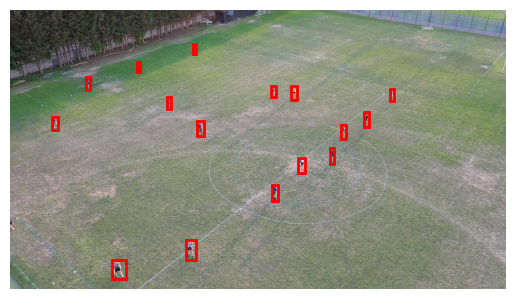

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# List of bounding box coordinates
bbox_list = [a['bbox'] for a in annotations]

# # Load and display the image using Matplotlib
image_path = 'images/' + coco.imgs[0]['file_name'].split('-')[-1]  # Replace with the actual image path
image = plt.imread(image_path)
i_height, i_width, _ = image.shape

scale_height = i_height /original_height
scale_width = i_width/ original_widht

plt.imshow(image)

# Create patches for each bounding box and add them to the plot
for bbox in bbox_list:
    x, y, width, height = [bbox[0]* scale_width ,
                           bbox[1]* scale_height,
                           bbox[2]* scale_width,
                           bbox[3]* scale_height]
    rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)

# Display the plot
plt.axis('off')
plt.show()

In [118]:
# build dataset

def image_file_name(name):
  p2 = name.split('-')[-1]
  p1 = 'images/'
  return  p2

def create_dataset(coco):

  output = []

  images = coco.imgs

  for i in images:
    image = images[i]

    annotation_ids = coco.getAnnIds(imgIds=i)
    annotations = coco.loadAnns(annotation_ids)

    original_height = image['height']
    original_widht = image['width']

    bboxs = []

    for bbox in annotations:

      norm_bbox = [bbox['bbox'][0] / original_widht,
                  bbox['bbox'][1] / original_height,
                  bbox['bbox'][2] / original_widht,
                  bbox['bbox'][3] / original_height]

      bboxs.append(norm_bbox)

    output.append({'image_name': image_file_name(image['file_name']), 'normalized_bboxes': bboxs  })

  return output

In [119]:
labels = create_dataset(coco)

In [120]:
image_file_name(labels[0]['image_name'])

'output_067.png'

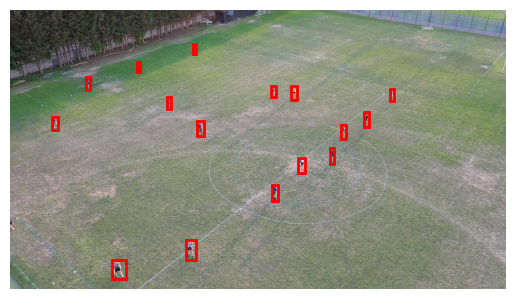

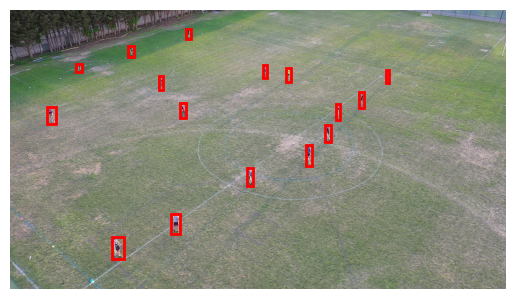

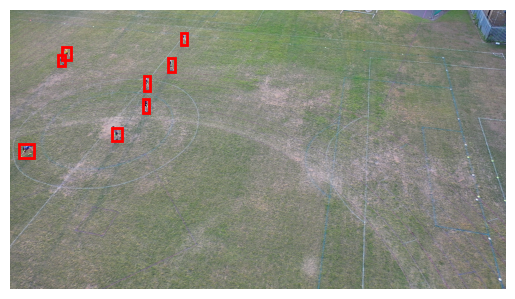

KeyboardInterrupt: ignored

In [123]:

import matplotlib.pyplot as plt
import matplotlib.patches as patches

def display_image_and_bbox(record):

  # Assuming your list of lists is named "bbox_list"
  bbox_list = record['normalized_bboxes']

  # Load the image using matplotlib's `imread` function (replace with your own image loading code)
  image_path = 'images/' + record['image_name']  # Replace with the actual image file path
  image = plt.imread(image_path)

  # Create a figure and axes
  fig, ax = plt.subplots()

  # Display the image
  ax.imshow(image)

  # Iterate through the list of bounding box coordinates
  for bbox in bbox_list:
      min_x, min_y, width, height = bbox
      i_height, i_width, _ = image.shape

      # Create a rectangle patch
      rect = patches.Rectangle((min_x*i_width, min_y*i_height), width*i_width, height*i_height, linewidth=2, edgecolor='r', facecolor='none')

      # Add the rectangle patch to the axes
      ax.add_patch(rect)

  # Show the plot
  plt.axis('off')  # Optional: Turn off the axis labels
  plt.show()


for record in labels:
  display_image_and_bbox(record)

In [44]:

import numpy as np

def generate_mask(bbox_list, resolution):
    """
    Generate a boolean NumPy mask based on a list of normalized bounding box coordinates.

    Args:
        bbox_list (list): List of normalized bounding box coordinates in the format [min_x, min_y, width, height].
        resolution (tuple): Resolution of the mask as a tuple (width, height).

    Returns:
        numpy.ndarray: Boolean NumPy mask with the specified resolution.
    """
    # Create an empty mask with the specified resolution
    mask = np.zeros(resolution, dtype=bool)

    # Iterate through the list of normalized bounding box coordinates
    for bbox in bbox_list:
        min_x, min_y, width, height = bbox

        # Calculate the pixel coordinates of the bounding box
        x1 = int(min_x * resolution[1])
        y1 = int(min_y * resolution[0])
        x2 = int((min_x + width) * resolution[1])
        y2 = int((min_y + height) * resolution[0])

        # Set the region within the bounding box to True in the mask
        mask[y1:y2, x1:x2] = True

    return mask

In [124]:
labels[0]

{'image_name': 'output_067.png',
 'normalized_bboxes': [[0.3764044943820225,
   0.39767054908485855,
   0.014044943820224717,
   0.05324459234608984],
  [0.5252808988764045,
   0.2712146422628951,
   0.010299625468164793,
   0.04159733777038269],
  [0.20599250936329588,
   0.8951747088186356,
   0.027153558052434457,
   0.06988352745424291],
  [0.3539325842696629,
   0.8252911813643926,
   0.019662921348314606,
   0.06821963394342762],
  [0.5280898876404494,
   0.6256239600665557,
   0.011235955056179777,
   0.05657237936772045],
  [0.5795880149812733,
   0.5307820299500832,
   0.014044943820224717,
   0.05158069883527454],
  [0.6441947565543072,
   0.49251247920133107,
   0.009363295880149815,
   0.059900166389351084],
  [0.6676029962546817,
   0.4126455906821963,
   0.009363295880149815,
   0.048252911813643926],
  [0.7125468164794007,
   0.36605657237936773,
   0.011235955056179777,
   0.05324459234608984],
  [0.7649812734082397,
   0.2828618968386024,
   0.008426966292134831,
   0.

In [125]:
sorted_labels = sorted(labels, key=lambda x: x['image_name'])

In [127]:

masks = []
for l in sorted_labels:
  masks.append(generate_mask(l["normalized_bboxes"], [400,700]))

masks = np.array(masks)
masks.shape


(68, 400, 700)

In [49]:

import os
from PIL import Image
import numpy as np

# Specify the directory path containing PNG files
directory = 'images'  # Replace with the actual directory path

# Get a list of PNG file names in the directory, sorted in file name order
png_files = sorted([file for file in os.listdir(directory) if file.endswith('.png')])

# Read and resize PNG files into a NumPy matrix
images = []
for png_file in png_files:
    image_path = os.path.join(directory, png_file)
    image = Image.open(image_path)
    resized_image = image.resize((700, 400))  # Specify the desired new width and height
    image_array = np.array(resized_image)
    images.append(image_array)

# Convert the list of images into a NumPy matrix
images_matrix = np.stack(images)

# Print the shape of the matrix
print(images_matrix.shape)


(68, 400, 700, 3)


In [113]:
png_files

['output_001.png',
 'output_002.png',
 'output_003.png',
 'output_004.png',
 'output_005.png',
 'output_006.png',
 'output_007.png',
 'output_008.png',
 'output_009.png',
 'output_010.png',
 'output_011.png',
 'output_012.png',
 'output_013.png',
 'output_014.png',
 'output_015.png',
 'output_016.png',
 'output_017.png',
 'output_018.png',
 'output_019.png',
 'output_020.png',
 'output_021.png',
 'output_022.png',
 'output_023.png',
 'output_024.png',
 'output_025.png',
 'output_026.png',
 'output_027.png',
 'output_028.png',
 'output_029.png',
 'output_030.png',
 'output_031.png',
 'output_032.png',
 'output_033.png',
 'output_034.png',
 'output_035.png',
 'output_036.png',
 'output_037.png',
 'output_038.png',
 'output_039.png',
 'output_040.png',
 'output_041.png',
 'output_042.png',
 'output_043.png',
 'output_044.png',
 'output_045.png',
 'output_046.png',
 'output_047.png',
 'output_048.png',
 'output_049.png',
 'output_050.png',
 'output_051.png',
 'output_052.png',
 'output_053

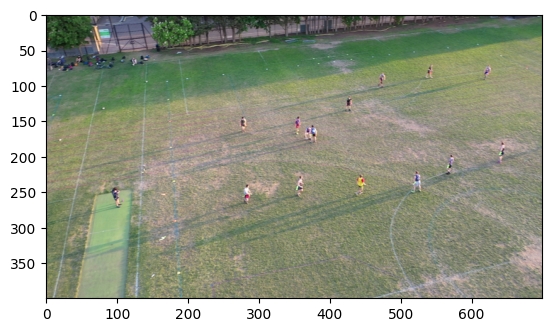

In [50]:

plt.imshow(images_matrix[4])

In [129]:

X = images_matrix / 255.
y = masks.astype(float)

X.shape, y.shape


((68, 400, 700, 3), (68, 400, 700))

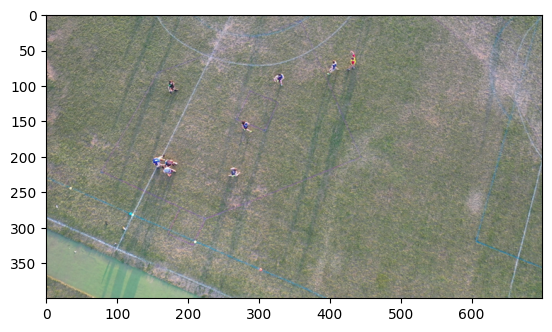

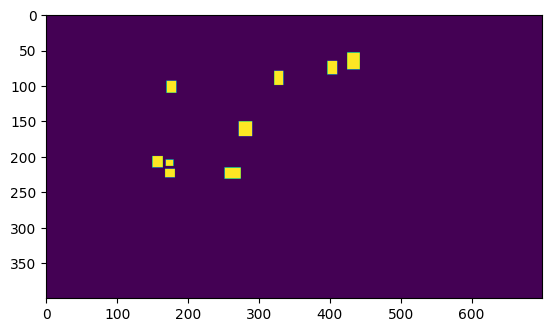

In [131]:
plt.imshow(X[30])
plt.show()
plt.imshow(y[30])
plt.show()

In [132]:


from sklearn.model_selection import train_test_split

In [133]:


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                      test_size=0.2, random_state=42)

In [134]:

import tensorflow as tf
from tensorflow import keras

In [135]:
input_shape = (400, 700, 3)

# Create the model
model = keras.Sequential()

# Add layers to the model
model.add(keras.layers.Input(shape=input_shape))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

In [136]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 400, 700, 32)      896       
                                                                 
 conv2d_15 (Conv2D)          (None, 400, 700, 32)      9248      
                                                                 
 conv2d_16 (Conv2D)          (None, 400, 700, 32)      9248      
                                                                 
 conv2d_17 (Conv2D)          (None, 400, 700, 32)      9248      
                                                                 
 conv2d_18 (Conv2D)          (None, 400, 700, 32)      9248      
                                                                 
 conv2d_19 (Conv2D)          (None, 400, 700, 32)      9248      
                                                                 
 conv2d_20 (Conv2D)          (None, 400, 700, 1)      

In [137]:

full_history = {}

In [ ]:

history = model.fit(X_train, y_train, epochs=300, batch_size=15, validation_data=(X_test, y_test))


In [175]:
model.save('v2_68.h5')

In [139]:

# Append the current epoch history to the full history
for key, value in history.history.items():
    if key not in full_history:
        full_history[key] = []
    full_history[key].extend(value)


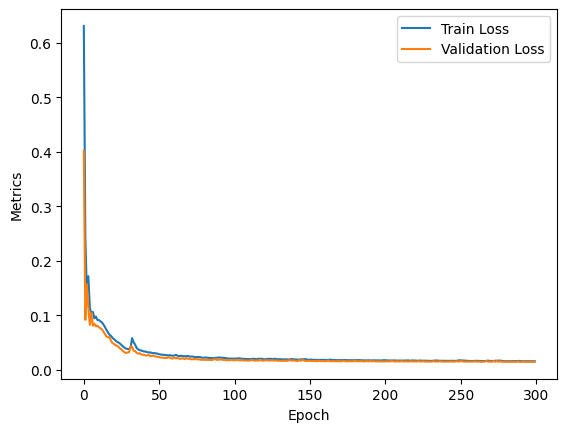

In [140]:
# Plot the full train and validation curves
plt.plot(full_history['loss'], label='Train Loss')
plt.plot(full_history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.legend()
plt.show()


1/1 [==============================] - 0s 97ms/step


In [164]:
N = 10
prediction = model.predict( np.expand_dims(X_test[N], axis=0) )
TEST_IMAGE = X_test[N]

1/1 [==============================] - 0s 31ms/step


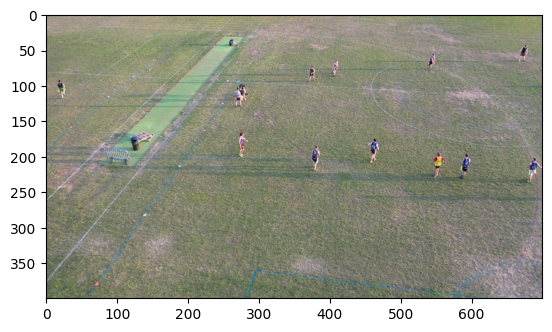

In [165]:

plt.imshow(TEST_IMAGE)

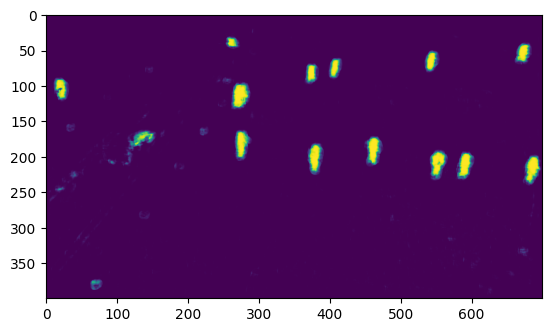

In [166]:

plt.imshow(prediction[0])

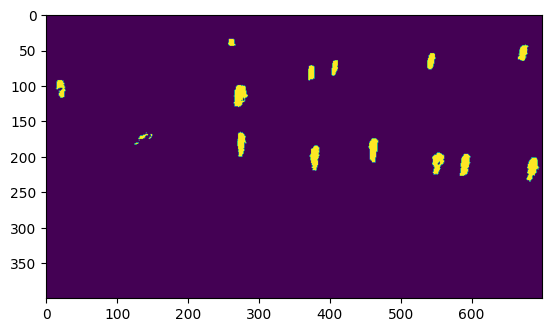

In [171]:

poloarize = prediction[0] > 0.8
plt.imshow(poloarize)

In [172]:

# import numpy as np
# from scipy.ndimage import binary_dilation

# def expand_islands(matrix, n):
#     # Create a structuring element for dilation
#     structure = np.ones((3, 3), dtype=int)

#     # Perform binary dilation on the matrix
#     dilated_matrix = binary_dilation(matrix, iterations=n)

#     return dilated_matrix

# # Assuming you have a matrix called 'matrix' with islands of ones
# expanded_matrix = expand_islands(poloarize, n=1)
# plt.imshow(expanded_matrix)


[  0.  84. 223. 200. 155. 171. 211. 432. 306.   1.  50.  15. 331.   1.
  12. 341. 350. 334. 365.]


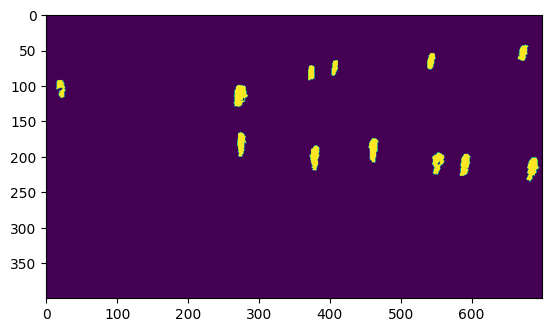

In [173]:

from scipy.ndimage import label, sum

def remove_small_islands(matrix, n):
    labeled_matrix, num_features = label(matrix)  # Label connected components
    component_sizes = sum(matrix, labeled_matrix, range(num_features + 1))  # Calculate sizes

    # Create a mask to filter out small islands
    print(component_sizes)
    mask = (component_sizes >= n)

    # Apply the mask to remove small islands
    filtered_matrix = mask[labeled_matrix]

    return filtered_matrix

# Assuming you have a matrix called 'matrix' with islands of ones
filtered_matrix = remove_small_islands(poloarize, n=100)
plt.imshow(filtered_matrix)

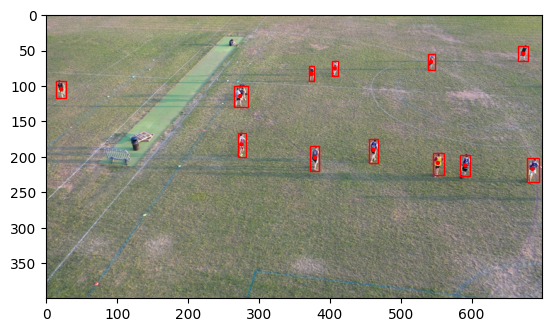

In [174]:

import numpy as np
from scipy.ndimage import label

def find_islands(matrix):

  # Apply the label function to find connected components
  labeled_matrix, num_labels = label(matrix)

  # Get the unique labels
  unique_labels = np.unique(labeled_matrix)

  # Assuming you have a matrix image 'image' and a list of points 'points'
  # Display the matrix image
  # plt.imshow(labeled_matrix)
  plt.imshow(TEST_IMAGE)

  # Set the plot aspect ratio to equal
  plt.gca().set_aspect('equal')

  # Iterate over the unique labels (excluding background label 0)
  for label_value in unique_labels[1:]:
      # Create a mask for the current label
      mask = (labeled_matrix == label_value)

      # Find the indices of the ones in the mask
      indices = np.where(mask)

      avg_y = indices[0].mean()
      avg_x = indices[1].mean()

      min_x = indices[1].min()
      max_x = indices[1].max()

      min_y = indices[0].min()
      max_y = indices[0].max()

      x, y = avg_x, avg_y
      circle = plt.Circle((x, y), radius=2, color='red', fill=True)

      rect = plt.Rectangle((min_x, min_y), max_x - min_x, max_y - min_y,
                         linewidth=1, edgecolor='r', facecolor='none')
      plt.gca().add_patch(circle)
      plt.gca().add_patch(rect)

      # print(avg_x, avg_y)
      # Print the coordinates of the island
      # print(f"Island {label_value}:")
      # for y, x in zip(indices[0], indices[1]):
      #     print(f"({x}, {y})")
      # print()
  plt.show()

find_islands(filtered_matrix)
